<a href="https://colab.research.google.com/github/mostafa-sadeghi/amirali_eslami/blob/main/s11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!unzip "/content/drive/MyDrive/Fashion/archive.zip" -d "/content/drive/MyDrive/Fashion"

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

fashion_train_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_train.csv', sep=",")

In [3]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_test.csv', sep=",")

print(fashion_train_df.shape, fashion_test_df.shape)


training = np.array(fashion_train_df, dtype="float32")
testing = np.array(fashion_test_df, dtype="float32")



(60000, 785) (10000, 785)


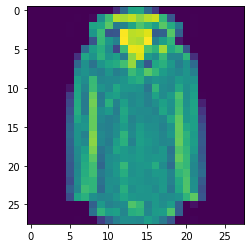

In [5]:
plt.imshow(training[22,1:].reshape(28,28));

In [6]:
label = training[22,0]
label

4.0

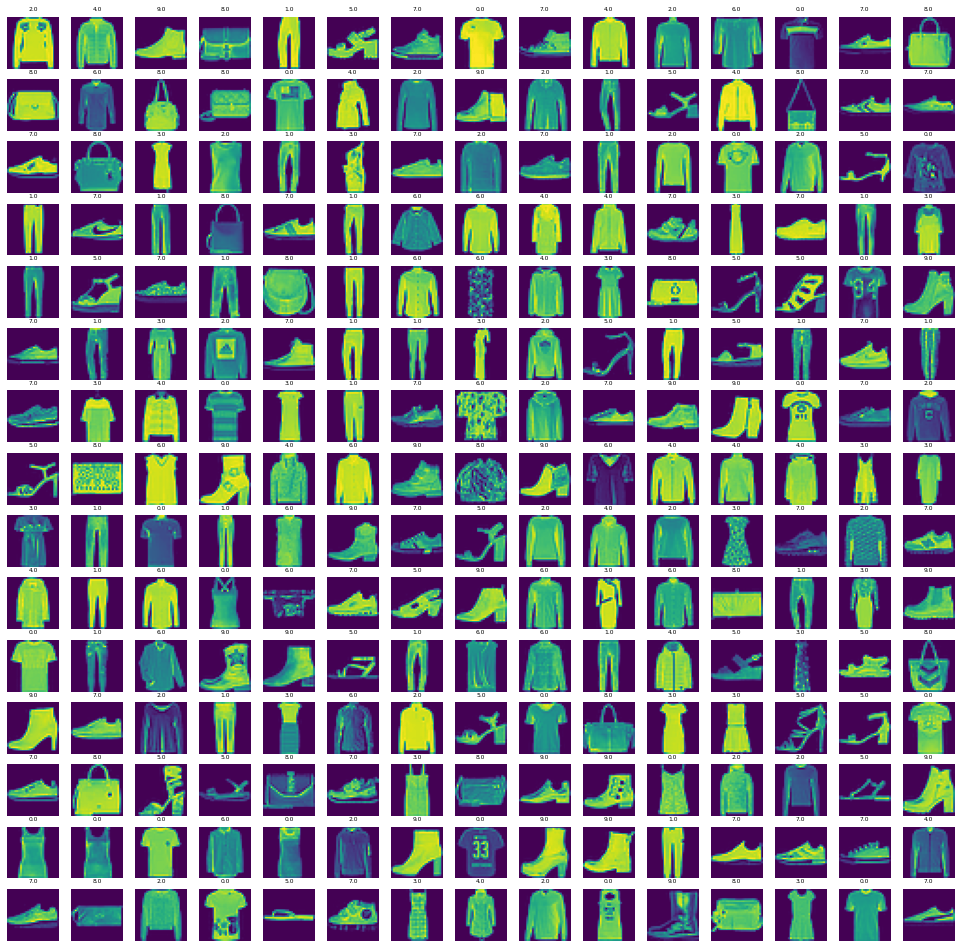

In [7]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(training[index, 1:].reshape(28,28))
  axes[i].set_title(training[index, 0], fontsize=6)
  axes[i].axis('off')

## Training The Model

In [8]:
X_train = training[:,1:]/255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
y_train = training[:,0]
y_train
len(y_train)

60000

In [10]:
X_test = testing[:,1:]/255
y_test = testing[:,0]
len(y_test)

10000

In [11]:
train_X=np.dstack([X_train] * 3)
test_X=np.dstack([X_test]*3)
train_X.shape,test_X.shape

((60000, 784, 3), (10000, 784, 3))

In [12]:
# Reshape images as per the tensor format required by tensorflow
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
from tensorflow.keras.utils import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in test_X])
train_X.shape, test_X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

print(len(X_train))
len(X_validate)

In [ ]:
X_train.shape[0]

In [ ]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

X_train.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam
import tensorflow as tf

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation="relu"))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation="relu"))
cnn_model.add(Dense(10,activation="sigmoid"))

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
cnn_model.summary()

In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_validate, y_validate))

In [ ]:
evaluation = cnn_model.evaluate(X_test,y_test)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

In [ ]:
predicted_classes = cnn_model.predict(X_test)
len(predicted_classes)

In [ ]:
print(predicted_classes[0])
y_test[0]

In [ ]:
np.argmax(predicted_classes[0])

In [ ]:
y_test[0]

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()
print(axes.shape)
X_test[0].shape
for i in np.arange(0,25):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i]):.1f}\nTrue class = {y_test[i]}")


  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)